Antes de entrar a los problemas de grafos, vamos a diseñar un conjunto de rutinas que nos permitirán visualizar los grafos

In [215]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph_with_curved_labels(edges, directed=True):
    """
    Plots a graph with curved edges and edge labels placed over the curves.
    
    Parameters:
    edges (list of tuples): Each tuple should contain three elements:
                            (source, destination, cost).
    
    Returns:
    None: Displays the graph plot with curved edges and edge labels.
    """
    # Create a directed or undirected graph based on the parameter
    G = nx.DiGraph() if directed else nx.Graph()

    # Add edges to the graph from the provided edge list
    for edge in edges:
        source, destination, cost = edge
        G.add_edge(source, destination, weight=cost)  # Include the cost as edge weight

    # Use the Fruchterman-Reingold layout algorithm for positioning the nodes
    pos = nx.fruchterman_reingold_layout(G)

    plt.figure(figsize=(9, 6))  # Set the figure size

    # Draw the graph nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw the node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Draw the edges with curved connections and arrowheads
    nx.draw_networkx_edges(
        G, pos, 
        connectionstyle='arc3,rad=0.2',  # Curve the edges
        arrowstyle='-|>',  # Use arrowheads for directed edges
        arrowsize=20  # Size of the arrowheads
    )

    # Create a dictionary for edge labels based on edge weights
    edge_labels = {(u, v): f'{G[u][v]["weight"]}' for u, v in G.edges()}

    # Draw the edge labels positioned along the curved edges
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels,
        label_pos=0.5,  # Position labels at the midpoint of edges
        connectionstyle='arc3,rad=0.2',  # Curve the labels along with the edges
        rotate=False  # Do not rotate labels
    )

    plt.show()  # Display the graph

def plot_unweighted_graph(edges, directed=True):
    """
    Plots an unweighted graph with optional directionality.
    
    Parameters:
    edges (list of tuples): Each tuple should contain two elements:
                            (source, destination).
    
    Returns:
    None: Displays the unweighted graph plot.
    """
    # Create a directed or undirected graph based on the parameter
    G = nx.DiGraph() if directed else nx.Graph()

    # Add edges to the graph from the provided edge list
    for edge in edges:
        source, destination = edge
        G.add_edge(source, destination)  # Add the edge without weights

    # Use the Fruchterman-Reingold layout algorithm for positioning the nodes
    pos = nx.fruchterman_reingold_layout(G)

    plt.figure(figsize=(9, 6))  # Set the figure size

    # Draw the graph nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw the node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Draw the edges with curved connections and arrowheads
    nx.draw_networkx_edges(
        G, pos, 
        connectionstyle='arc3,rad=0.2',  # Curve the edges
        arrowstyle='-|>',  # Use arrowheads for directed edges
        arrowsize=20  # Size of the arrowheads
    )

    plt.show()  # Display the graph

def plot_graph(edges, weighted=True, directed=True):
    """
    Wrapper function to plot either a weighted or unweighted graph.
    
    Parameters:
    edges (list of tuples): Edge list, either weighted or unweighted.
    weighted (bool): Indicates whether to plot a weighted graph.
    directed (bool): Indicates whether the graph is directed.
    
    Returns:
    None: Displays the graph plot.
    """
    if weighted: 
        plot_graph_with_curved_labels(edges, directed=directed)  # Call the function for weighted graphs
    else: 
        plot_unweighted_graph(edges, directed=directed)  # Call the function for unweighted graphs

def read_edge_list_from_file(filename):
    """
    Reads an edge list from a text file and returns it as a list of tuples.
    
    Parameters:
    filename (str): The path to the text file containing the edge list.
    
    Returns:
    list: A list of tuples where each tuple contains (source, destination, cost).
    """
    edges = []  # Initialize an empty list to store edges
    
    # Open the specified file in read mode
    with open(filename, 'r') as file:
        for line in file:  # Iterate over each line in the file
            parts = line.split()  # Split the line into parts
            if len(parts) == 3:  # Ensure there are exactly three parts
                source, destination, cost = map(int, parts)  # Convert strings to integers
                edges.append((source, destination, cost))  # Add the edge to the list
    
    return edges  # Return the list of edges


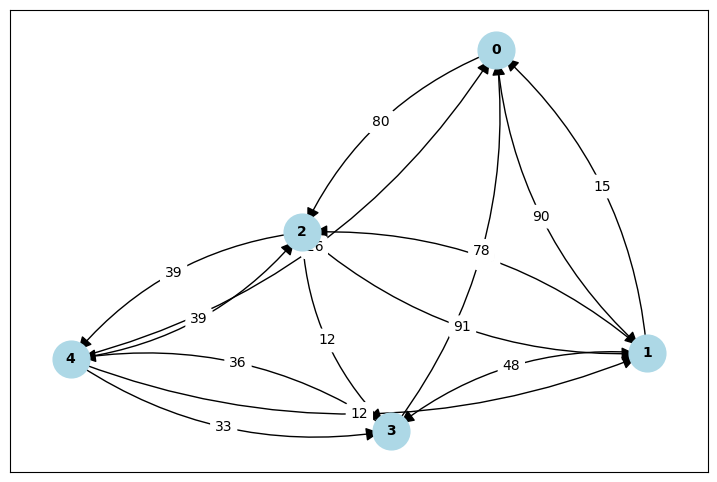

In [216]:
edges = read_edge_list_from_file('Java Projects\GraphsImplementations\data\graph_weighted_directed.txt')
plot_graph(edges)

In [217]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost Dijkstra "data\graph_weighted_directed.txt"



Minimum Cost Matrix using Dijkstra: 

      |    0    1    2    3    4
---------------------------------
    0 |    0   90   80   92  119
    1 |   15    0   69   48   84
    2 |   65   51    0   12   39
    3 |   62   48   75    0   36
    4 |   26   12   39   33    0

Execution time in microseconds: 1910


In [218]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost BellmanFord "data\graph_weighted_directed.txt"



Minimum Cost Matrix using BellmanFord: 

      |    0    1    2    3    4
---------------------------------
    0 |    0   90   80   92  119
    1 |   15    0   69   48   84
    2 |   65   51    0   12   39
    3 |   62   48   75    0   36
    4 |   26   12   39   33    0

Execution time in microseconds: 380


In [219]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost FloydWarshall "data\graph_weighted_directed.txt"



Minimum Cost Matrix using FloydWarshall: 

      |    0    1    2    3    4
---------------------------------
    0 |  105   90   80   92  119
    1 |   15   96   69   48   84
    2 |   65   51   78   12   39
    3 |   62   48   75   69   36
    4 |   26   12   39   33   69

Execution time in microseconds: 60
